Curso de Big Data
==============================

Trabajo práctico 3
------------------------------

### Grupo: Armas Braithwaite, Fernández, Menta, Vargas Ochuza

## Parte 1: Análisis de la base de hogares y cálculo de pobreza


### Inciso 1

###### Las variables relevantes para explicar la pobreza creemos que son las siguientes:
###### - ITF_hogar (Monto de ingreso total familiar)}: Evalúa la disponibilidad de recursos económicos en el hogar, lo que está estrechamente relacionado con la pobreza.
###### - Región (REGION): La ubicación geográfica de un hogar puede tener un impacto significativo en su nivel de vida y acceso a recursos. Por lo tanto, la región en la que se encuentra el hogar es una variable importante.
###### - Características de la vivienda (IV2, IV3, IV6, IV8, IV10, IV12_1, IV_12_2, IV12_3): Estas variables describen aspectos de la vivienda, como el número de habitaciones, el estado del piso, el acceso a agua, la presencia de baño, la proximidad a basurales, zonas inundables y villas de emergencia. Estas características pueden estar relacionadas con la calidad de vida y el nivel de pobreza.
###### - Características habitacionales del hogar (II1, II7, II8, II9): Estas variables describen el número de habitaciones en el hogar, el régimen de tenencia de la vivienda y el tipo de combustible utilizado para cocinar.
###### - Estrategias del hogar (V1, V2, V4, V5, V6, V12, V14, V17): Estas variables exploran cómo las personas del hogar obtienen ingresos y si han tenido que recurrir a estrategias como pedir préstamos, vender pertenencias o recibir ayuda social. Estas estrategias pueden indicar la vulnerabilidad económica del hogar.
###### - Resumen del hogar (IX_TOT): La cantidad de miembros en el hogar es un factor importante para evaluar la pobreza, ya que un hogar con más miembros puede requerir más recursos para satisfacer sus necesidades básicas.
###### - IPCF_hogar (Monto de ingreso per cápita familiar): Proporciona información sobre los recursos disponibles por persona en el hogar, lo que está relacionado con la pobreza.

### Inciso 2

In [1]:
# Importamos los módulos necesarios para trabajar con la base de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargamos las bases
microdata_hogar = pd.read_excel("usu_hogar_T123.xlsx")
microdata_indv = pd.read_excel("usu_individual_T123.xlsx")

In [3]:
# Del diccionario de variables sabemos que tenemos que quedarnos solamente con los valores 32 y 33
# que son los correspondientes a Ciudad Autónoma de Buenos Aires o Gran Buenos Aires.

# Filtramos el dataframe y lo renombramos
microdata_indv_filtered = microdata_indv[(microdata_indv['AGLOMERADO'] == 32) | (microdata_indv['AGLOMERADO'] == 33)]
len(microdata_indv_filtered)

7619

In [4]:
# Filtramos el dataframe y lo renombramos
microdata_hogar_filtered = microdata_hogar[(microdata_hogar['AGLOMERADO'] == 32) | (microdata_hogar['AGLOMERADO'] == 33)]
len(microdata_hogar_filtered)


2736

### Inciso 3

In [5]:
# Realizamos un inner join de las bases para quedarnos solo con las filas cuyo identificador de hogar se encuentre en ambas bases
# Importante remarcar que hacemos el merge por vivienda y hogar! ya que pueden haber 2 viviendas en un mismo hogar.

merged_microdata = microdata_indv_filtered.merge(microdata_hogar_filtered, on=['CODUSU', "NRO_HOGAR"], how='inner')

# Renombrar las columnas con sufijo "_x" a "_indv"
merged_microdata.rename(columns=lambda x: x.replace("_x", "_indv"), inplace=True)

# Renombrar las columnas con sufijo "_y" a "_hogar"
merged_microdata.rename(columns=lambda x: x.replace("_y", "_hogar"), inplace=True)

# Esto ultimo no es particularmente necesario pues muchos de los valores son duplicados.

In [6]:
# Chequeamos la dimension
len(merged_microdata)

7619

In [7]:
# Chequeamos la dimension
len(merged_microdata.columns)

263

### Inciso 4 e Inciso 5

In [8]:
# Identificar variables con NaN y contar cuántos NaN
# Utilizamos funciones de Pandas para identificar y limpiar NaN.

variables_con_nan = merged_microdata.columns[merged_microdata.isna().any()].tolist()
conteo_de_nans = merged_microdata[variables_con_nan].isna().sum()

# Imprimir las variables con NaN y la cantidad de NaN en cada una
for variable in variables_con_nan:
    print(f'Variable: {variable}, Cantidad de NaN: {conteo_de_nans[variable]}')

Variable: CH08, Cantidad de NaN: 1
Variable: CH14, Cantidad de NaN: 3959
Variable: CH15_COD, Cantidad de NaN: 6248
Variable: CH16_COD, Cantidad de NaN: 7515
Variable: IMPUTA, Cantidad de NaN: 7548
Variable: PP03C, Cantidad de NaN: 4096
Variable: PP03D, Cantidad de NaN: 4096
Variable: PP3E_TOT, Cantidad de NaN: 4096
Variable: PP3F_TOT, Cantidad de NaN: 4096
Variable: PP03G, Cantidad de NaN: 4096
Variable: PP03H, Cantidad de NaN: 4096
Variable: PP03I, Cantidad de NaN: 4096
Variable: PP03J, Cantidad de NaN: 4096
Variable: INTENSI, Cantidad de NaN: 4096
Variable: PP04A, Cantidad de NaN: 4096
Variable: PP04B_COD, Cantidad de NaN: 4096
Variable: PP04B1, Cantidad de NaN: 4096
Variable: PP04B2, Cantidad de NaN: 4096
Variable: PP04B3_MES, Cantidad de NaN: 4096
Variable: PP04B3_ANO, Cantidad de NaN: 4096
Variable: PP04B3_DIA, Cantidad de NaN: 4096
Variable: PP04C, Cantidad de NaN: 4096
Variable: PP04C99, Cantidad de NaN: 4096
Variable: PP04D_COD, Cantidad de NaN: 4096
Variable: PP04G, Cantidad d

In [9]:
# Establecer el umbral para determinar qué columnas eliminar
# El umbral aquí es el número mínimo de valores no-NaN que debe tener la columna para no ser eliminada
total_filas = len(merged_microdata)
umbral = total_filas - 3500

# Eliminar columnas con más de 3500 valores NaN
merged_microdata = merged_microdata.dropna(thresh=umbral, axis=1)

print(len(merged_microdata))  # Esto imprime el número de filas.
print(len(merged_microdata.columns))  # Esto imprime el número de columnas restantes.


7619
152


In [10]:
# Identificar variables con NaN y contar cuántos NaN
# Utilizamos funciones de Pandas para identificar y limpiar NaN.

variables_con_nan = merged_microdata.columns[merged_microdata.isna().any()].tolist()
conteo_de_nans = merged_microdata[variables_con_nan].isna().sum()

# Imprimir las variables con NaN y la cantidad de NaN en cada una
for variable in variables_con_nan:
    print(f'Variable: {variable}, Cantidad de NaN: {conteo_de_nans[variable]}')

Variable: CH08, Cantidad de NaN: 1
Variable: P47T, Cantidad de NaN: 24


In [11]:
# Eliminar las observaciones con NaN 
merged_microdata.dropna(subset=['CH08'], inplace=True)
merged_microdata.dropna(subset=['P47T'], inplace=True)

In [12]:
print(len(merged_microdata))  
print(len(merged_microdata.columns))  

7594
152


In [13]:
# Definimos las variables que deseamos filtrar
variables = ['ITF_hogar', 'ITF_indv', 'IPCF_hogar', 'IPCF_indv', 'P21', 'P47T']

# Definir el umbral del percentil (en este caso, 97%)
percentile_threshold = 0.97

# Iterar sobre las variables y aplicar el filtrado utlizando Pandas.
for variable in variables:
    # Calcular el percentil umbral
    percentile_value = merged_microdata[variable].quantile(percentile_threshold)
    
    # Filtrar el DataFrame para mantener solo los valores por debajo del percentil
    merged_microdata = merged_microdata[merged_microdata[variable] <= percentile_value]

len(merged_microdata)

6362

In [14]:
# Eliminar aquellas columnas que contienen string y no aportan al análisis, y aquellas variables que tienen
# los mismos valores para todas las observaciones debido a que pueden generar multicolinealidad y no
# aportan variabilidad
merged_microdata = merged_microdata.drop(columns=['ANO4_indv','TRIMESTRE_indv','REGION_indv','ANO4_hogar','TRIMESTRE_hogar','REGION_hogar', 'CH05', 'MAS_500_indv', 'MAS_500_hogar'])


In [15]:
# Transformamos las variables categóricas enteras en dummies

# Lista de columnas categóricas para convertir a dummies
columns_to_dummies = ['NIVEL_ED', 'CH07', 'CH08', 'CH09', 'CH12', 'CH15', 'CH16', 'ESTADO', 'CAT_OCUP', 'CAT_INAC']

# Crear dummies y concatenar con el DataFrame original excluyendo las columnas originales
merged_microdata = pd.get_dummies(merged_microdata, columns=columns_to_dummies)

# merged_microdata_with_dummies ahora tiene las variables originales más las dummies.


In [16]:
len(merged_microdata.columns)

198

In [17]:
# Limpiamos algunas variables con valores especificos utlizando Pandas

merged_microdata = merged_microdata[merged_microdata['IV2'] != 99]
merged_microdata = merged_microdata[merged_microdata['II1'] != 99]
merged_microdata = merged_microdata[merged_microdata['II9'] > 0]
merged_microdata = merged_microdata[merged_microdata['ITF_hogar'] >= 0]
merged_microdata = merged_microdata[merged_microdata['ITF_indv'] >= 0]
merged_microdata = merged_microdata[merged_microdata['IPCF_hogar'] >= 0]
merged_microdata = merged_microdata[merged_microdata['IPCF_indv'] >= 0]


len(merged_microdata)

6360

### Inciso 6

**IV8** Tiene baño

**IV3** Piso interior de la casa

**V4** La cubierta exterior del techo es de...

**IV11** El desague del baño es...

**IPCF_hogar** Monto de ingreso per cápita familiar del hogar

##### Separamos el analisis entre categoricas y no categoricas.

In [18]:
merged_microdata['IPCF_hogar'].describe().T

count      6360.000000
mean      25018.267167
std       32090.617716
min           0.000000
25%           0.000000
50%           0.000000
75%       45480.000000
max      125000.000000
Name: IPCF_hogar, dtype: float64

C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


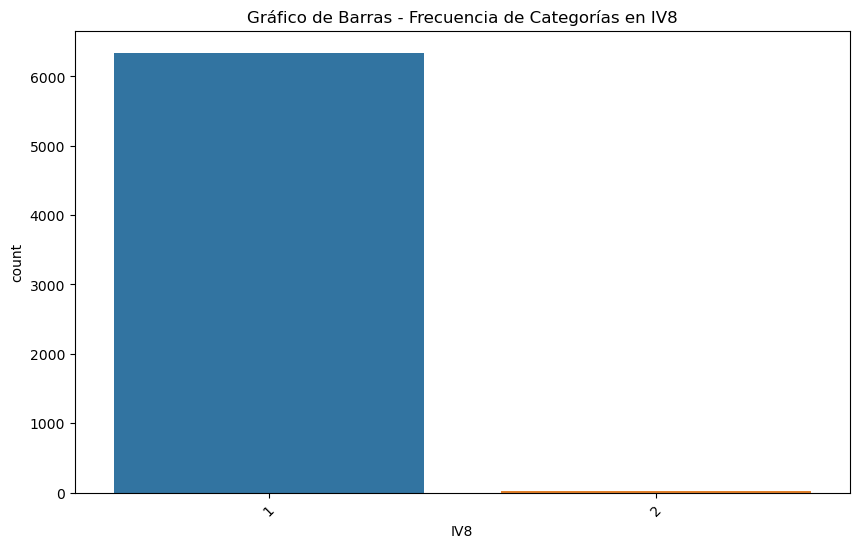

Porcentaje de cada categoría en IV8:
IV8
1    99.732704
2     0.267296
Name: proportion, dtype: float64



C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


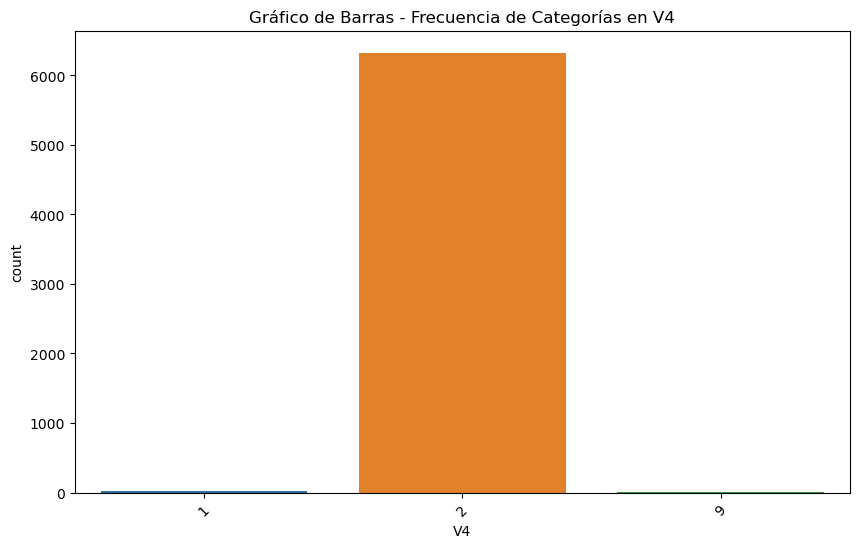

Porcentaje de cada categoría en V4:
V4
2    99.496855
1     0.345912
9     0.157233
Name: proportion, dtype: float64



C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


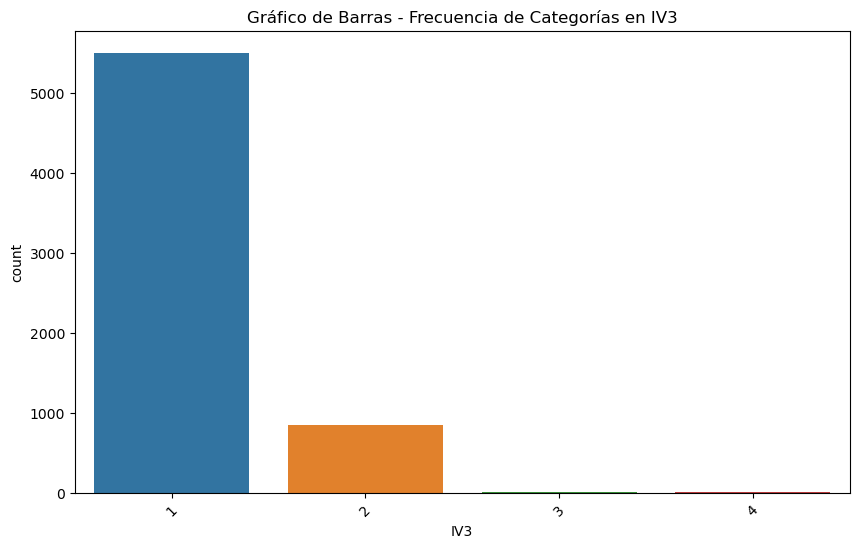

Porcentaje de cada categoría en IV3:
IV3
1    86.525157
2    13.191824
3     0.204403
4     0.078616
Name: proportion, dtype: float64



C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


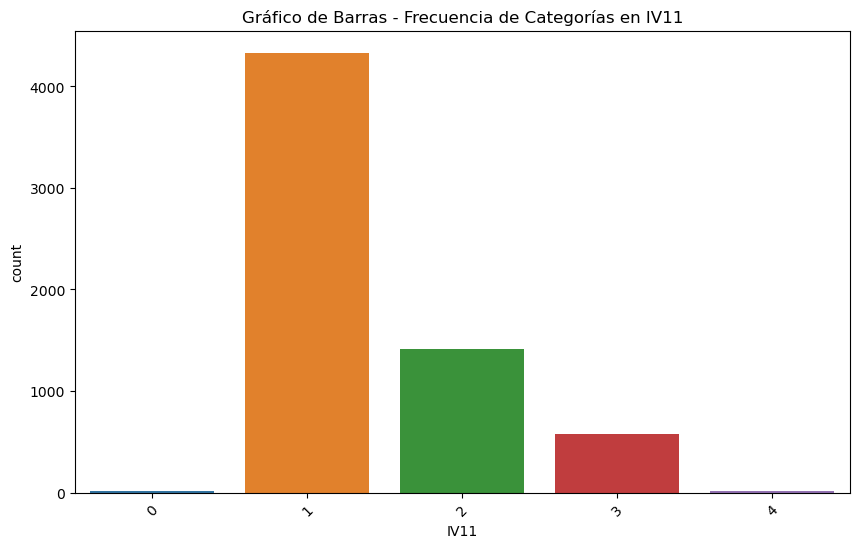

Porcentaje de cada categoría en IV11:
IV11
1    68.113208
2    22.264151
3     9.135220
0     0.267296
4     0.220126
Name: proportion, dtype: float64



In [19]:
variables = ['IV8', 'V4', 'IV3', 'IV11']

for var in variables:
    # Conteo de frecuencias
    conteo_frecuencias = merged_microdata[var].value_counts()

    # Gráfico de barras
    plt.figure(figsize=(10, 6))
    sns.countplot(data=merged_microdata, x=var)
    plt.title(f'Gráfico de Barras - Frecuencia de Categorías en {var}')
    plt.xticks(rotation=45)
    plt.show()

    # Porcentaje de cada categoría
    porcentaje = merged_microdata[var].value_counts(normalize=True) * 100
    print(f"Porcentaje de cada categoría en {var}:")
    print(porcentaje)
    print()

In [20]:
# Armamos una función para no tener que lidiar con el tedioso uso del archivo de Excel.

# Esta función, asignar_valor, toma dos argumentos, edad y genero, y asigna un valor numérico basado en reglas condicionales
# que dependen de estos dos argumentos. Las condiciones se prueban en orden y, cuando se encuentra una coincidencia, se
# devuelve un valor específico. Si no se cumple ninguna condición, la función devuelve None.
#Las condiciones están diseñadas para categorizar a las personas en grupos según su edad y género y asignarles un valor numérico basado en esas categorías.

def asignar_valor(edad, genero):
    if edad < 1:
        if genero == 2:
            return 0.35
        elif genero == 1:
            return 0.35
    elif edad == 1:
        if genero == 2:
            return 0.37
        elif genero == 1:
            return 0.37
    elif edad == 2:
        if genero == 2:
            return 0.46
        elif genero == 1:
            return 0.46
    elif edad == 3:
        if genero == 2:
            return 0.51
        elif genero == 1:
            return 0.51
    elif edad == 4:
        if genero == 2:
            return 0.55
        elif genero == 1:
            return 0.55
    elif edad == 5:
        if genero == 2:
            return 0.60
        elif genero == 1:
            return 0.60
    elif edad == 6:
        if genero == 2:
            return 0.64
        elif genero == 1:
            return 0.64
    elif edad == 7:
        if genero == 2:
            return 0.66
        elif genero == 1:
            return 0.66
    elif edad == 8:
        if genero == 2:
            return 0.68
        elif genero == 1:
            return 0.68
    elif edad == 9:
        if genero == 2:
            return 0.69
        elif genero == 1:
            return 0.69
    elif edad == 10:
        if genero == 2:
            return 0.70
        elif genero == 1:
            return 0.79
    elif edad == 11:
        if genero == 2:
            return 0.72
        elif genero == 1:
            return 0.82
    elif edad == 12:
        if genero == 2:
            return 0.74
        elif genero == 1:
            return 0.85
    elif edad == 13:
        if genero == 2:
            return 0.76
        elif genero == 1:
            return 0.90
    elif edad == 14:
        if genero == 2:
            return 0.76
        elif genero == 1:
            return 0.96
    elif edad == 15:
        if genero == 2:
            return 0.77
        elif genero == 1:
            return 1.00
    elif edad == 16:
        if genero == 2:
            return 0.77
        elif genero == 1:
            return 1.03
    elif edad == 17:
        if genero == 2:
            return 0.77
        elif genero == 1:
            return 1.04
    elif 18 <= edad <= 29:
        if genero == 2:
            return 0.76
        elif genero == 1:
            return 1.02
    elif 30 <= edad <= 45:
        if genero == 2:
            return 0.77
        elif genero == 1:
            return 1.00
    elif 46 <= edad <= 60:
        if genero == 2:
            return 0.76
        elif genero == 1:
            return 1.00
    elif 61 <= edad <= 75:
        if genero == 2:
            return 0.67
        elif genero == 1:
            return 0.83
    elif edad > 75:
        if genero == 2:
            return 0.63
        elif genero == 1:
            return 0.74
    else:
        return None  # En caso de que no haya una combinación válida

### Inciso 7

In [21]:
# Aplicamos la funcion al data frame. Creamos una nueva columna llamada 'adulto_equiv' en el DataFrame 'microdata_filtered', donde se calculan y asignan valores equivalentes para adultos
# a partir de las edades ('CH06') y géneros ('CH04') de cada fila utilizando una función llamada 'asignar_valor'.

merged_microdata['adulto_equiv'] = merged_microdata.apply(lambda row: asignar_valor(row['CH06'], row['CH04']), axis=1)

In [22]:
# Limpiamos y Renombramos

merged_microdata = merged_microdata.dropna(subset=['adulto_equiv'])

result = merged_microdata.groupby(by=['CODUSU','NRO_HOGAR']).agg({'adulto_equiv': 'sum'}).reset_index()
result.rename(columns={'adulto_equiv': 'ad_equiv_hogar'}, inplace=True)

merged_microdata_FINAL = pd.merge(merged_microdata, result[['CODUSU','NRO_HOGAR', 'ad_equiv_hogar']],
                     on=['CODUSU','NRO_HOGAR'],
                     how='left')

### Inciso 8

In [23]:
# Definimos ambas bases según los criterios del enunciado, comprobando la condición sobre ITF.
# Imprimimos la longitud del DataFrame para obtener las cantidades.

# Reemplazar NaN por ceros en ITF_indv e ITF_hogar
merged_microdata['ITF_indv'].fillna(0, inplace=True)
merged_microdata['ITF_hogar'].fillna(0, inplace=True)

respondieron = merged_microdata_FINAL[(merged_microdata_FINAL['ITF_indv'] != 0) | (merged_microdata_FINAL['ITF_hogar'] != 0)]
print(len(respondieron))



3138


In [24]:
norespondieron = merged_microdata_FINAL[(merged_microdata_FINAL['ITF_indv'] == 0) & (merged_microdata_FINAL['ITF_hogar'] == 0)]
print(len(norespondieron))

3222


In [25]:
# Definimos el valor de la canasta básica y luego
# seguimos las instrucciones del enunciado para añadir una columna que indique el ingreso necesario

valor_canasta_basica = 57371.05

respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar'] * valor_canasta_basica

C:\Users\mateo\AppData\Local\Temp\ipykernel_4404\2316923591.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar'] * valor_canasta_basica


### Inciso 9

In [26]:
# Creamos una nueva columna llamada 'pobre' en el DataFrame 'respondieron',
# donde se asigna un valor de 1 si el valor en la columna 'ITF' es menor que
# el valor en la columna 'ingreso_necesario', y 0 en caso contrario, convirtiendo los resultados a enteros.

respondieron['pobre'] = ((respondieron['ITF_hogar'] < respondieron['ingreso_necesario']) & (respondieron['ITF_indv'] < respondieron['ingreso_necesario'])).astype(int)

# Sumamos todos los 1

num_pobres = respondieron['pobre'].sum()

print(f'Número de pobres identificados: {num_pobres}')

# En %

print(num_pobres/len(respondieron))



Número de pobres identificados: 1486
0.4735500318674315


C:\Users\mateo\AppData\Local\Temp\ipykernel_4404\4235357720.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pobre'] = ((respondieron['ITF_hogar'] < respondieron['ingreso_necesario']) & (respondieron['ITF_indv'] < respondieron['ingreso_necesario'])).astype(int)


In [27]:
# Guardamos como csv estas bases por si se desea correr Parte 3 de manera separada a la Parte 1. 
respondieron.to_csv('respondieron.csv', index=False)
norespondieron.to_csv('norespondieron.csv', index=False)

### Inciso 10

In [28]:
merged_microdata_FINAL['PONDIH_hogar']

0        2540
1        2540
2       14082
3       14082
4       14082
        ...  
6355     4220
6356     4220
6357        0
6358        0
6359        0
Name: PONDIH_hogar, Length: 6360, dtype: int64

In [29]:
# Agrupar por hogar y utilizar el ponderador PONDIH para calcular la tasa de hogares pobres
# Agrupamos los datos por el código del hogar (CODUSU)
microdata_repres = respondieron.groupby('CODUSU').first().reset_index()


In [30]:
# Ponderacion
microdata_repres['ponderacion'] = microdata_repres['PONDIH_indv'] * microdata_repres['pobre']

In [31]:
pobres = microdata_repres['ponderacion'].sum()
poblacion = microdata_repres['PONDIH_indv'].sum()
porcentaje_pobres = (pobres / poblacion) * 100

In [32]:
pobres1 = '{:,}'.format(pobres).replace(',', '.')
print(f"pobres: {pobres1}")
print(f"tasa {porcentaje_pobres:.2f}%")

pobres: 1.439.914
tasa 36.66%


#### La tasa de pobreza nos dio 6 PP mayor que la reportada por el INDEC. Creemos que esto puede ser debido a distintos criterios de limpieza de la base. Aun asi, la diferencia no es tan significativa.

# Parte 2: Construcción de funciones

In [33]:
import pandas as pd
import numpy as np
#from ISLP import load_data

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm

import os  
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import statsmodels.api as sm     

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier


## Inciso 1

#### Escriban una funcion, llamada evalua metodo, que reciba como argumentos un modelo y los datos de entrenamiento y prueba (X train, y train, X test,y test).
#### La función debe ajustar el modelo con los datos de entrenamiento y calcular las métricas que considere necesarias para esta problem´atica (de mínima, deben reportar la matriz de confusión, las curvas ROC y los valores d eAUC y de accuracy score de cada método). 
#### El output de la función debe se runa colección con las métricas evaluadas.


In [34]:
def evalua_metodo(model, X_train, y_train, X_test, y_test, plot=True, coef=False):
    '''
    Evalua un modelo de clasificación proporcionando métricas clave y visualizando la curva ROC. 
    También puede proveer los coeficientes estimados en el modelo y la proporción de coeficientes iguales a cero.

    Input:
    - modelo: modelo de clasificación ya instanciado (debe tener los métodos `fit`, `predict` y `predict_proba`).
    - X_train, y_train: datos de entrenamiento.
    - X_test, y_test: datos de prueba.
    - plot (default=True): argumento booleano. 
    - coef(default=False): argumento booleano. 
    Output:
    - Diccionario con las siguientes métricas:
        * matriz_confusion: Matriz de confusión del modelo.
        * valor_auc: Área bajo la curva ROC.
        * accuracy: Precisión del modelo.
        En caso coef=True, también incluye:
        * Diccionario de variables y sus coeficientes estimados.
        * Proporción de variables con coeficientes estimados iguales a cero. 
    - Gráfico de la curva ROC si plot=True. 
    '''
    model_to_evaluate = model
    # Ajustar el modelo con los datos de entrenamiento
    model_fit = model_to_evaluate.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model_fit.predict(X_test)

    # Calcular el área bajo la curva ROC y trazar la curva ROC
    auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Matriz de confusión
    matriz_confusion = confusion_matrix(y_test, y_pred)

    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)

    # Trazar la curva ROC
    if plot:
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='Curva ROC (área = %0.2f)' % auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlabel('Tasa de falsos positivos')
        plt.ylabel('Tasa de verdaderos positivos')
        plt.title('Curva ROC')
        plt.legend(loc="lower right")
        plt.show()

    # ECM
    ecm = mean_squared_error(y_test, y_pred) # Deseamos tener esta métrica disponible para la siguiente función. 
    if coef:
        coeficientes = dict(zip(X_train.columns, model_fit.coef_[0])) # Generamos un diccionario donde cada llave es el nombre de una variable y su valor es el coeficiente estimado.
        proporcion_variables_cero = sum(value == 0 for value in model_fit.coef_[0]) / len(coeficientes) # Guardamos la proporción de variables con coeficiente estimado igual a cero.

    # Retornar las métricas evaluadas
    metrics = {
        'AUC': auc,
        'Confusion Matrix': matriz_confusion,
        'Accuracy Score': accuracy,
        'ECM': ecm,
    }

    if coef:
        metrics['Coeficientes'] = coeficientes
        metrics['Proporción de Variables con Coeficiente Cero'] = proporcion_variables_cero

    return metrics

## Inciso 2

#### Escriban una función, llamada cross validation, que realice validación cruzada con k iteraciones (k-fold CV), llamando a la función del  inciso anterior en cada una, pero para las k distintas particiones. 
#### La función debe recibir como argumentos el modelo, el valor de k y un dataset (es decir, s´olo X e y).
#### Pueden ayudarse con la función KFold para generar las particiones necesarias

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [36]:
def cross_validation(modelo, k, x, y, std=True, coef=False):
    if isinstance(x, np.ndarray):
        x = pd.DataFrame(x)
    if isinstance(y, np.ndarray):
        y = pd.DataFrame(y)

    """
    Realiza validación cruzada k-fold y evalúa un modelo de clasificación en cada partición.
    
    Inputs:
    - modelo: modelo de clasificación ya instanciado.
    - k: número de particiones para la validación cruzada.
    - X: variables independientes del conjunto de datos. Para nuestros fines predictivos, debería ser la muestra de entrenamiento. 
    - y: variable dependiente (target) del conjunto de datos. Para nuestros fines predictivos, debería ser la muestra de entrenamiento.
    - std: argumento booleano.
            Si std= True estandarizamos las variables explicativas. Esto es necesario al momento de regularizar por Lasso o Ridge.
    - coef: argumento booleano. 
    Outputs:
    - Un DataFrame con k filas, una para cada iteración de la validación cruzada. Tiene las siguientes columnas:
        - partición: número de partición 
        - el error cuadrático medio (ECM)    
        - Si Coef=True, reportamos la proporción de variables iguales a cero. 
        Esto nos sirve para analizar el resultado de regularizar vía Lasso.
    
    """
    sc = StandardScaler()
    kf = KFold(n_splits=k, shuffle=True, random_state=2023)
    output = []

    for i, (train_index, test_index) in enumerate(kf.split(x)):
        x_train, x_test = x.iloc[list(train_index)], x.iloc[list(test_index)]
        y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]

        if std:
            x_train = pd.DataFrame(sc.fit_transform(x_train), index=x_train.index, columns=x_train.columns)
            x_test = pd.DataFrame(sc.transform(x_test), index=x_test.index, columns=x_test.columns)

        # Llamar a evalua_metodo para calcular las métricas
        metrics = evalua_metodo(modelo, x_train, y_train, x_test, y_test, plot=False, coef=coef)

        # Extraer las métricas calculadas en evalua_metodo
        matriz_confusion = metrics['Confusion Matrix']
        valor_auc = metrics['AUC']
        accuracy = metrics['Accuracy Score']
        ecm = metrics['ECM']

        proporcion_variables_cero = None

        if coef:
            proporcion_variables_cero = metrics['Proporción de Variables con Coeficiente Cero']

        output.append((i + 1, ecm, valor_auc, accuracy, matriz_confusion, proporcion_variables_cero))

    output_df = pd.DataFrame(output, columns=["Particion", "MSE", "valor_auc", "accuracy", "matriz_confusion", "proporcion_variables_cero"])
    return output_df

## Inciso 3

#### Escriban una función, llamada evalua config que reciba una lista de configuraciones de hiperparámetros (los distintos valores a probar como hiper-parámetros podrian codificarse en diccionarios de Python)y utilizando la función cross validation obtenga el error cuadrado promedio para cada configuración.

In [37]:
def evalua_config(model_types, lambdas, X_T, y_T, declar=True):
    """
    Encuentra el valor óptimo de lambda para Ridge, Lasso o ambos modelos en un modelo de clasificación.
    Inputs:
    - model_types: Lista de tipos de modelo ('ridge', 'lasso', o ambos). Si no es ('ridge', 'lasso', o ambos), no se regulariza. 
    - lambdas: Lista de valores de lambda para evaluar.
    - X_T: Variables explicativas. Debería ser la muestra de entrenamiento. 
    - y_T: Variable objetivo (etiquetas binarias 0 y 1). Debería ser la muestra de entrenamiento.
    - declar: argumento booleano que imprime la configuración óptima if True. No lo hace d.o.m.
    Outputs:
    - DataFrame que contiene: el método de regularización, los valores de lambda y los errores cuadráticos medios para los modelos seleccionados.
    
    """

    if not all(model_type in ['ridge', 'lasso'] for model_type in model_types):
        raise ValueError("Los elementos en 'model_types' deben ser 'ridge', 'lasso', o ambos.")

    resultados_lambda = []

    for model_type in model_types:
        if model_type == 'ridge':
            modelo = LogisticRegression(penalty='l2', solver='liblinear')
        else:
            modelo = LogisticRegression(penalty='l1', solver='liblinear')

        for alpha in lambdas:
            modelo.set_params(C=1/alpha)

            # Realizar validación cruzada utilizando cross_validation
            resultados = cross_validation(modelo, k=5, x=X_T, y=y_T, std=True)

            # Calcular el Error Cuadrático Medio (ECM) promedio
            ecm_promedio = np.mean(resultados['MSE'])

            resultados_lambda.append((model_type, alpha, ecm_promedio))
    # Crear un DataFrame a partir de la lista de tuplas
    resultados_df = pd.DataFrame(resultados_lambda, columns=["Model Type", "Lambda", "ECM"])
    #min_ecm = resultados_df['ECM'].min()
    #resultados_df['config. óptima'] = resultados_df['ECM'] == min_ecm
    optimal_configuration = resultados_df.loc[resultados_df['ECM'].idxmin()]
    optimal_lambda = optimal_configuration['Lambda']
    optimal_model_type = optimal_configuration['Model Type']
    if declar:
        print(f"La configuración óptima es: Lambda = {optimal_lambda}, Model Type = {optimal_model_type}")
    return resultados_df

## Inciso 4

#### Escriban una función llamada "evalua multiples metodos" que les permita implementar los siguiente métodos con los hiperparámetros que ustedes elijan. 
#### Para la regresión logística, aseg´urense de que esta función utilice su función.
#### evalua config para optimizar el λ de la regularizaci´on. Finalmente, el output de la función debe ser una tabla donde las columnas sean las métricas que hayan evaluado (las que hayan incluido en la función evalua metodo) y las filas sean los modelos (con su configuraci´on de hiperpar´ametros asociada) que hayan corrido.
#### Asegúrense de que la tabla incluya una columna con nombre del modelo y el valor de los hiperparámetros/configuración:

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

def evalua_multiples_metodos(X_train, y_train, X_test, y_test, metodos):
    """
    Evalúa varios métodos de clasificación con hiperparámetros personalizados y regresión logística con optimización de lambda.

    Inputs:
    - X_train: variables explicativas, datos de la muestra de entrenamiento 
    - X_test: variables explicativas, datos de la muestra de prueba
    - Y_train: variable objetivo binaria, datos de la muestra de entrenamiento 
    - Y_test: variable objetivo binaria, datos de la muestra de prueba  
    - metodos: Lista de diccionarios que especifican los modelos (Regresión Logística, KNN y ADL) y sus hiperparámetros.
    Outputs:
    - DataFrame que contiene las métricas evaluadas para cada modelo, el nombre del modelo, los hiperparámetros utilizados, el método de regularización para el modelo logit y el número del hiperparámetro óptimo para el modelo logit.
    Nota: estandarizamos las variables explicativas en dos instancias. Primero, evalua_config estandariza las variables explicativas dentro de cada submuestra como
    parte de la configuración de su función interna cross_validation. Luego, para comparar la performance de los modelos, los corremos utilizando las variables estandarizadas dentro
    de la muestra de entrenamiento y de prueba. 
    """
    resultados = []  # Resultados como una lista de diccionarios
    
    for metodo in metodos:
        nombre_modelo = metodo['nombre']
        hiperparametros = metodo['hiperparametros']
        resultados_modelo = {}  # Inicializar resultados_modelo
        sc = StandardScaler()
        X_train_std = pd.DataFrame(sc.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
        X_test_std = pd.DataFrame(sc.transform(X_test), index=X_test.index, columns=X_test.columns)
        
        if nombre_modelo == 'Regresión Logística':
            # Optimizar lambda (α) para la regularización de la Regresión Logística
            lambdas = hiperparametros.get('lambdas', [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]) ## Default de lambdas a evaluar.
            resultados_log = evalua_config(['ridge', 'lasso'], lambdas, X_train, y_train,declar=False)
            mejor_lambda = resultados_log.loc[resultados_log['ECM'].idxmin()]['Lambda']
            mejor_metodo = resultados_log.loc[resultados_log['ECM'].idxmin()]['Model Type']
            if mejor_metodo == "ridge":
                modelo = LogisticRegression(penalty='l2', C=1/mejor_lambda, solver='liblinear')
            else:
                modelo = LogisticRegression(penalty='l1', C=1/mejor_lambda, solver='liblinear')
            
            resultados_modelo = evalua_metodo(modelo, X_train_std, y_train, X_test_std, y_test, plot=False)
        elif nombre_modelo == 'Análisis de Discriminante Lineal':
            # Crear el modelo de Análisis de Discriminante Lineal con los hiperparámetros personalizados
            modelo = LinearDiscriminantAnalysis(**hiperparametros)
            # Evaluar el modelo
            resultados_modelo = evalua_metodo(modelo, X_train_std, y_train, X_test_std, y_test, plot=False)
        elif nombre_modelo == 'KNN':
            # Crear el modelo K-Nearest Neighbors (KNN) con los hiperparámetros personalizados
            modelo = KNeighborsClassifier(**hiperparametros)
            # Evaluar el modelo
            resultados_modelo = evalua_metodo(modelo, X_train_std, y_train, X_test_std, y_test, plot=False)
        
        # Agregar el nombre del modelo y los hiperparámetros/configuración
        resultados_modelo['Modelo'] = nombre_modelo
        resultados_modelo['Hiperparámetros'] = str(hiperparametros)
        
        if nombre_modelo == 'Regresión Logística':
            resultados_modelo['Método de Regularización'] = mejor_metodo
            resultados_modelo['Hiperparámetro Óptimo'] = mejor_lambda
        else:
            resultados_modelo['Método de Regularización'] = None
            resultados_modelo['Hiperparámetro Óptimo'] = None
        
        resultados.append(resultados_modelo)
    
    resultados_df = pd.DataFrame(resultados)
    return resultados_df  # Resultados es un DataFrame que contiene los resultados de cada modelo

# Parte 3: Análisis de la base de hogares y cálculo de pobreza

In [39]:
import pandas as pd
import numpy as np
#from ISLP import load_data

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

## Inciso 1

#### Eliminen de ambas bases (respondieron, norespondieron) todas las variables relacionadas a ingresos. Eliminen también las columnas adulto equiv, ad equiv hogar e ingreso necesario.
#### Establezcan a la variable pobre como su variable dependiente (vector y). El resto de las variables serán las variables independientes (matriz X). 
#### Dependiendo de la función que usen, no se olviden de agregar la columna de 1 cuando sea necesario.

In [40]:
variables = respondieron.columns
for variable in variables:
   print(variable)

CODUSU
NRO_HOGAR
COMPONENTE
H15
AGLOMERADO_indv
PONDERA_indv
CH03
CH04
CH06
CH10
CH11
CH13
PP02C1
PP02C2
PP02C3
PP02C4
PP02C5
PP02C6
PP02C7
PP02C8
PP02E
PP02H
PP02I
P21
DECOCUR
RDECOCUR
GDECOCUR
ADECOCUR
PONDIIO
TOT_P12
P47T
DECINDR
RDECINDR
GDECINDR
ADECINDR
PONDII
V2_M
V3_M
V4_M
V5_M
V8_M
V9_M
V10_M
V11_M
V12_M
V18_M
V19_AM
V21_M
T_VI
ITF_indv
DECIFR_indv
RDECIFR_indv
GDECIFR_indv
ADECIFR_indv
IPCF_indv
DECCFR_indv
RDECCFR_indv
GDECCFR_indv
ADECCFR_indv
PONDIH_indv
REALIZADA
AGLOMERADO_hogar
PONDERA_hogar
IV1
IV2
IV3
IV4
IV5
IV6
IV7
IV8
IV9
IV10
IV11
IV12_1
IV12_2
IV12_3
II1
II2
II3
II3_1
II4_1
II4_2
II4_3
II5
II5_1
II6
II6_1
II7
II8
II9
V1
V2
V21
V22
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19_A
V19_B
IX_TOT
IX_MEN10
IX_MAYEQ10
ITF_hogar
DECIFR_hogar
RDECIFR_hogar
GDECIFR_hogar
ADECIFR_hogar
IPCF_hogar
DECCFR_hogar
RDECCFR_hogar
GDECCFR_hogar
ADECCFR_hogar
PONDIH_hogar
VII1_1
VII1_2
VII2_1
VII2_2
VII2_3
VII2_4
NIVEL_ED_1
NIVEL_ED_2
NIVEL_ED_3
NIVEL_ED_4
NIVEL_ED_5
N

In [41]:
# Eliminar columnas específicas
respondieron = respondieron.drop(columns=['CODUSU'])

# Eliminar un rango de columnas: ingresos de la ocupación principal de los asalariados
respondieron = respondieron.drop(columns=[col for col in respondieron.columns if col.startswith('PP08')])

# Eliminar un rango de columnas: Ingresos de la ocupación principal de los trabajadores independientes
respondieron = respondieron.drop(columns=[col for col in respondieron.columns if col.startswith('PP06')])

# Ingresos de la ocupación principal
start = respondieron.columns.get_loc('P21')
end = respondieron.columns.get_loc('PONDIH_indv')

columns_to_drop = respondieron.columns[start:end+1]
respondieron = respondieron.drop(columns=columns_to_drop)

# Ingresos de la ocupación principal
start = respondieron.columns.get_loc('ITF_hogar')
end = respondieron.columns.get_loc('PONDIH_hogar')

columns_to_drop = respondieron.columns[start:end+1]
respondieron = respondieron.drop(columns=columns_to_drop)

# Ingresos de la ocupación principal
start = respondieron.columns.get_loc('adulto_equiv')
end = respondieron.columns.get_loc('ingreso_necesario')

columns_to_drop = respondieron.columns[start:end+1]
respondieron = respondieron.drop(columns=columns_to_drop)

In [42]:
# Eliminar columnas específicas
#norespondieron = norespondieron.drop(columns=['CODUSU'])

# Las columnas ingresos de la ocupación principal de los asalariados e Ingresos de la ocupación principal de 
# los trabajadores independientes fueron eliminadas previamente en la Parte 1 por su alto contenido de NAs

# Ingresos de la ocupación principal
start = norespondieron.columns.get_loc('P21')
end = norespondieron.columns.get_loc('PONDIH_indv')

columns_to_drop = norespondieron.columns[start:end+1]
norespondieron = norespondieron.drop(columns=columns_to_drop)

# Ingresos de la ocupación principal
start = norespondieron.columns.get_loc('ITF_hogar')
end = norespondieron.columns.get_loc('PONDIH_hogar')

columns_to_drop = norespondieron.columns[start:end+1]
norespondieron = norespondieron.drop(columns=columns_to_drop)

# Ingresos de la ocupación principal
start = norespondieron.columns.get_loc('adulto_equiv')
end = norespondieron.columns.get_loc('ad_equiv_hogar')

columns_to_drop = norespondieron.columns[start:end+1]
norespondieron = norespondieron.drop(columns=columns_to_drop)

In [43]:
# Definimos la matriz de Xs 
X = respondieron.drop(['pobre'], axis=1)
y = respondieron.pobre

## Inciso 2

#### Corran la funcion evalua multiples metodos (de la Parte 2) con la base respondieron, con al menos un hiperparámetro para regularizar y al menos un valor de \lambda. 

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

# Primero, definimos los hiperparámetros para cada método
hiperparametros_rl = {
    'lambdas': [ 1, 10, 100],
}

hiperparametros_lda = {
    'solver': 'lsqr',
}

hiperparametros_knn = {
    'n_neighbors': 5,
}

# Lista de métodos y sus hiperparámetros
metodos = [
    {
        'nombre': 'Regresión Logística',
        'hiperparametros': hiperparametros_rl,
    },
    {
        'nombre': 'Análisis de Discriminante Lineal',
        'hiperparametros': hiperparametros_lda,
    },
    {
        'nombre': 'KNN',
        'hiperparametros': hiperparametros_knn,
    },
]


In [45]:
### Segundo, definimos la muestra de entrenamiento y de prueba. 
# Para probar evalúa_metodo vamos a separar la muestra en train y test. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
# Ahora llamamos a la función
resultados_df=evalua_multiples_metodos(X_train,y_train,X_test,y_test, metodos)
# Ver los resultados

In [46]:
resultados_df

,AUC,Confusion Matrix,Accuracy Score,ECM,Modelo,Hiperparámetros,Método de Regularización,Hiperparámetro Óptimo
0,0.767991,"[[403, 118], [100, 321]]",0.768577,0.231423,Regresión Logística,"{'lambdas': [1, 10, 100]}",ridge,1.0
1,0.768087,"[[413, 108], [108, 313]]",0.770701,0.229299,Análisis de Discriminante Lineal,{'solver': 'lsqr'},None,NaN
2,0.751041,"[[394, 127], [107, 314]]",0.751592,0.248408,KNN,{'n_neighbors': 5},None,NaN


## Inciso 3

#### En el ejercicio de regularización, lambda actúa de manera similar tanto en regresión lineal como en regresión logística y clasificación. Lo que hace lambda es penalizar la minimización de la función de costo. La idea detrás de esto es reducir el overfitting: se establece un trade-off entre sesgar ligeramente nuestra estimación original en el conjunto de entrenamiento y reducir la varianza una vez que se aplica el modelo en el conjunto de prueba.Ahora bien, considerando que un valor alto de lambda hace que el modelo sea menos sensible a las variaciones en las variables explicativas, mientras que un valor bajo de lambda se acerca más a un modelo sin regularización, surge la pregunta de cómo elegir el valor adecuado de lambda. La mejor manera de abordar esta elección es mediante la validación cruzada, que implica probar distintos valores de lambda en un conjunto de entrenamiento y validación, eligiendo aquel que minimice la varianza en este último conjunto antes de evaluar el rendimiento en el conjunto de prueba.Es importante destacar que no se debe utilizar el conjunto de prueba para seleccionar el valor de lambda, ya que esto introduciría sesgo en la evaluación del rendimiento del modelo. 
#### Ajustar hiperparámetros en el conjunto de prueba haría que el modelo parezca funcionar mejor en datos no vistos de lo que sería en la práctica. En cambio, la validación cruzada nos permite evaluar diferentes valores de lambda en el conjunto de entrenamiento y validación sin involucrar el conjunto de prueba. Esto garantiza una estimación más realista del rendimiento del modelo en datos no vistos, ya que el conjunto de prueba se mantiene aislado y no se utiliza en la selección de hiperparámetros.

## Ejercicio 4

##### El método de K-fold cross-validation se utiliza para evaluar el rendimiento de modelos en machine learning dividiendo el conjunto de datos en K partes y probando iterativamente con una de ellas como conjunto de test y las demás como conjunto de entrenamiento.

##### Problema de usar un K muy pequeño: La evaluación puede ser sensible a la partición específica de los datos, lo que podría llevar a sobreajustar el modelo a ciertas peculiaridades y no generalizar bien a otros datos no vistos. 

##### Problema de usar un K muy grande (p. ej., K=n, LOOCV): En el extremo, esto implica una validación cruzada "leave-one-out," donde se deja una sola muestra como conjunto de test en cada iteración. Aunque proporciona estimaciones de rendimiento más estables, puede ser costoso en términos computacionales, especialmente en conjuntos de datos grandes.

##### Cuando K=n (LOOCV), se estima el modelo n veces, una vez por cada muestra en el conjunto de datos, entrenando en todas las muestras excepto una en cada iteración, y dejando la observación individual como testeo. Esto proporciona una estimación precisa del rendimiento, pero puede ser computacionalmente costoso y propenso a alta varianza en los resultados de los modelos. La alta variabilidad en las estimaciones de rendimiento significa que los resultados de cada iteración de LOOCV pueden diferir considerablemente entre sí. Esto puede hacer que sea más difícil confiar en las estimaciones de rendimiento y comparar diferentes configuraciones de modelos o hiperparámetros.

## Inciso 5

#### Realicen un barrido en λ = 10^n con n ∈ {−5, −4, −3 . . . , +4, +5} y utilicen 10 fold CV para elegir el λ optimo en regresion logistica con Ridge y con LASSO.
#### ¿Qué λ seleccionó en cada caso? Generen box-plots mostrando la distribución del error de predicci´on para cada λ. Cada box debe corresponder a un valor de λ y contener como observaciones el error medio de validaci´on para cada partici´on.
#### Ademas, para la regularizacion LASSO, genere un box-plot similar, pero ahora graficando la proporci´on de variables ignoradas por el modelo en funci´on de λ, es decir la proporcion de variables para las cuales el coeficiente asociado es cero.


### Primero identificamos el Lambda óptimo. 

In [47]:
lambda_values = [10**i for i in range(-5, 6)]
configuraciones_lasso = []
configuraciones_ridge = []

for l in lambda_values:
    # Para Lasso
    config_l = {'penalty': 'l1', 'C': 1/l, 'solver': 'saga'}
    configuraciones_lasso.append(config_l)
    
    # Para Ridge
    config_r = {'penalty': 'l2', 'C': 1/l}
    configuraciones_ridge.append(config_r) 

In [48]:
config_opt_lasso = evalua_config(["lasso"],lambda_values, X, y)
config_opt_ridge = evalua_config(["ridge"],lambda_values, X, y)


La configuración óptima es: Lambda = 1.0, Model Type = lasso
La configuración óptima es: Lambda = 10.0, Model Type = ridge


In [49]:
print(config_opt_lasso)

   Model Type        Lambda       ECM
0       lasso       0.00001  0.207132
1       lasso       0.00010  0.207132
2       lasso       0.00100  0.207132
3       lasso       0.01000  0.207132
4       lasso       0.10000  0.206814
5       lasso       1.00000  0.206176
6       lasso      10.00000  0.212547
7       lasso     100.00000  0.247925
8       lasso    1000.00000  0.473550
9       lasso   10000.00000  0.473550
10      lasso  100000.00000  0.473550


In [50]:
print(config_opt_ridge)

   Model Type        Lambda       ECM
0       ridge       0.00001  0.207132
1       ridge       0.00010  0.207132
2       ridge       0.00100  0.207132
3       ridge       0.01000  0.207132
4       ridge       0.10000  0.207451
5       ridge       1.00000  0.206495
6       ridge      10.00000  0.204900
7       ridge     100.00000  0.210637
8       ridge    1000.00000  0.232623
9       ridge   10000.00000  0.270232
10      ridge  100000.00000  0.285209


In [51]:
# Guardamos el lambda optimo en una variable
min_ecm_row = config_opt_lasso[config_opt_lasso['ECM'] == config_opt_lasso['ECM'].min()]
mejor_lambda_lasso = min_ecm_row['Lambda'].values[0]

In [52]:
# Guardamos el lambda optimo en una variable
min_ecm_row = config_opt_ridge[config_opt_ridge['ECM'] == config_opt_ridge['ECM'].min()]
mejor_lambda_ridge = min_ecm_row['Lambda'].values[0]

#### Ahora armaremos tres gráficos. 

## Gráfico 1: Distribución de ECM según el hiperparámetro Lambda, bajo el método Ridge

In [53]:
k = 10
dist_ridge = []

# Generaremos dos gráficos, uno por método. En cada gráfico, se muestra la distribución del error de predicción (definido como MSE) según el hiperparámetro lambda.
for config in configuraciones_ridge:
    modelo = LogisticRegression(max_iter=1000, **config)
    resultados = cross_validation(modelo, k, X, y)
    ecm_part = resultados[['Particion', 'MSE']]
    dist_ridge.append(ecm_part)


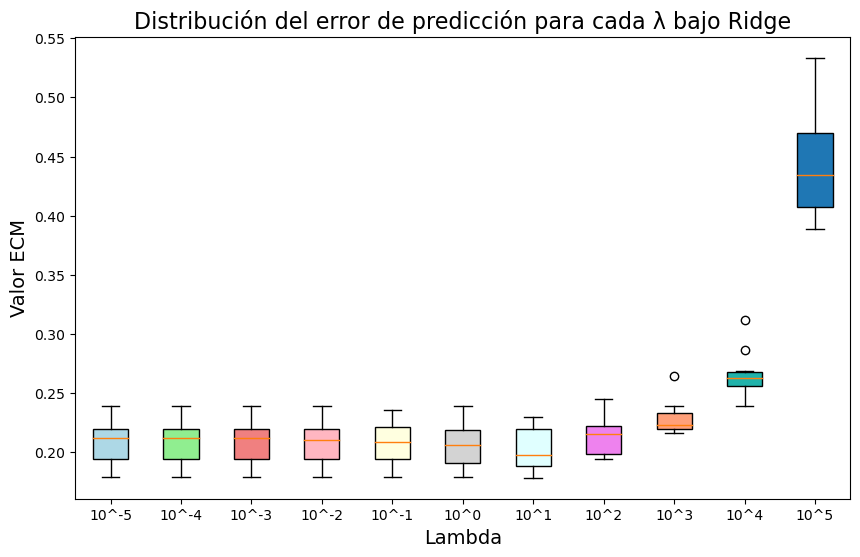

In [54]:
# Crear un gráfico con 10 boxplots
fig, ax = plt.subplots(figsize=(10, 6))

# Recopilar todas las distribuciones de MSE
mse_data = [ecm_part['MSE'].values for ecm_part in dist_ridge]

# Crear los boxplots y agregarlos al gráfico
boxplots = ax.boxplot(mse_data, patch_artist=True)

# Personalizar los colores de los boxplots (asegúrate de que todos los colores sean válidos)
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow', 
          'lightgray', 'lightcyan', 'violet', 'lightsalmon', 'lightseagreen']
for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)

# Configurar las etiquetas de los ticks del eje x con los valores de lambda
lambda_values = ['10^-5', '10^-4', '10^-3', '10^-2', '10^-1', '10^0', '10^1', '10^2', '10^3', '10^4', '10^5']
ax.set_xticklabels(lambda_values)

# Configurar las etiquetas de los ejes
ax.set_xlabel('Lambda', fontsize=14)
ax.set_ylabel('Valor ECM', fontsize=14)

# Configurar el título del gráfico
ax.set_title('Distribución del error de predicción para cada λ bajo Ridge', fontsize=16)

# Mostrar el gráfico
plt.show()

## Gráficos 2 y 3: Distribución de ECM y de proporción de variables con coeficiente igual a cero, según Lambda, bajo metodología LASSO

In [55]:
# Primero, obtenemos la distribución del MSE por partición. 
k = 10
dist_ecm_lasso = []
dist_prop_lasso=[]
for config in configuraciones_lasso:
    modelo = LogisticRegression(max_iter=1000, **config)
    resultados = cross_validation(modelo, k, X, y,coef=True)
    ecm_part = resultados[['Particion', 'MSE']]
    dist_ecm_lasso.append(ecm_part)
    prop_part = resultados[['Particion','proporcion_variables_cero']]
    dist_prop_lasso.append(prop_part) 

C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

### Gráfico 2

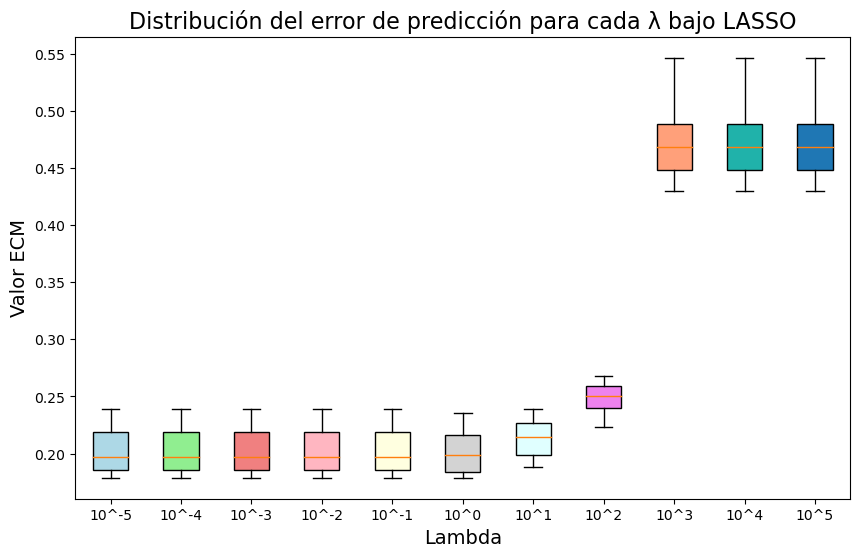

In [56]:
# Crear un gráfico con 10 boxplots
fig, ax = plt.subplots(figsize=(10, 6))

# Recopilar todas las distribuciones de MSE
mse_data = [ecm_part['MSE'].values for ecm_part in dist_ecm_lasso]

# Crear los boxplots y agregarlos al gráfico
boxplots = ax.boxplot(mse_data, patch_artist=True)

# Personalizar los colores de los boxplots (asegúrate de que todos los colores sean válidos)
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow', 
          'lightgray', 'lightcyan', 'violet', 'lightsalmon', 'lightseagreen']
for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)

# Configurar las etiquetas de los ticks del eje x con los valores de lambda
lambda_values = ['10^-5', '10^-4', '10^-3', '10^-2', '10^-1', '10^0', '10^1', '10^2', '10^3', '10^4', '10^5']
ax.set_xticklabels(lambda_values)

# Configurar las etiquetas de los ejes
ax.set_xlabel('Lambda', fontsize=14)
ax.set_ylabel('Valor ECM', fontsize=14)

# Configurar el título del gráfico
ax.set_title('Distribución del error de predicción para cada λ bajo LASSO', fontsize=16)

# Mostrar el gráfico
plt.show()



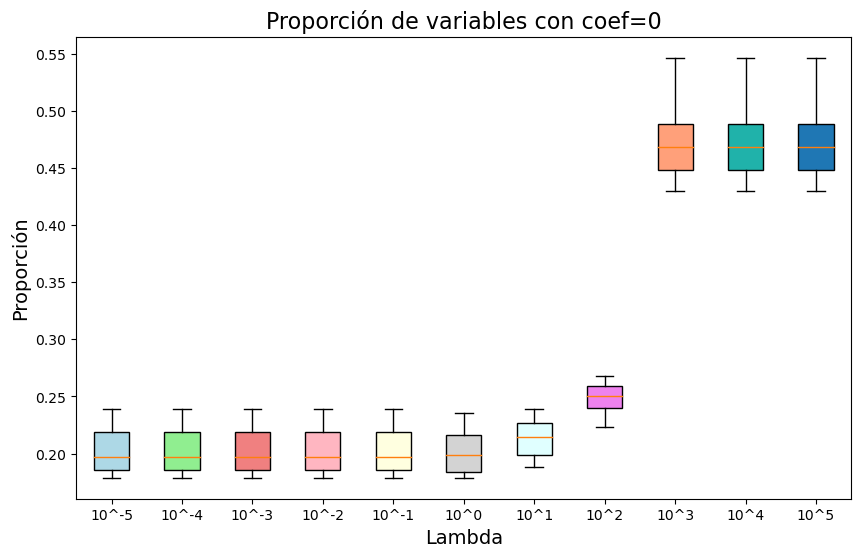

In [57]:
# Crear un gráfico con 10 boxplots
fig, ax = plt.subplots(figsize=(10, 6))

# Recopilar todas las distribuciones de MSE
prop_data = [prop_part['proporcion_variables_cero'].values for prop_part in dist_prop_lasso]

# Crear los boxplots y agregarlos al gráfico
boxplots = ax.boxplot(mse_data, patch_artist=True)

# Personalizar los colores de los boxplots (asegúrate de que todos los colores sean válidos)
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow', 
          'lightgray', 'lightcyan', 'violet', 'lightsalmon', 'lightseagreen']
for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)

# Configurar las etiquetas de los ticks del eje x con los valores de lambda
lambda_values = ['10^-5', '10^-4', '10^-3', '10^-2', '10^-1', '10^0', '10^1', '10^2', '10^3', '10^4', '10^5']
ax.set_xticklabels(lambda_values)

# Configurar las etiquetas de los ejes
ax.set_xlabel('Lambda', fontsize=14)
ax.set_ylabel('Proporción', fontsize=14)

# Configurar el título del gráfico
ax.set_title('Proporción de variables con coef=0', fontsize=16)

# Mostrar el gráfico
plt.show()

##### ¿Qué variables estamos excluyendo bajo el Lambda óptimo en LASSO?

In [58]:
# Definir el modelo
modelo = LogisticRegression(penalty='l1', C=1/mejor_lambda_lasso, solver='liblinear')
# Usar la función evalua_metodo
resultados = evalua_metodo(modelo, X_train, y_train, X_test, y_test, plot=False,coef=True)
print(resultados['Proporción de Variables con Coeficiente Cero'])

0.35570469798657717


In [59]:
dic_var=resultados['Coeficientes']
variables_con_valor_cero = [key for key, value in dic_var.items() if value == 0.0]
print(variables_con_valor_cero)

['H15', 'PP02C1', 'PP02C3', 'PP02C4', 'PP02C7', 'PP02C8', 'PP02E', 'PP02I', 'REALIZADA', 'IV12_3', 'II3_1', 'II5', 'V7', 'VII2_4', 'NIVEL_ED_1', 'NIVEL_ED_4', 'NIVEL_ED_5', 'CH07_1', 'CH07_3', 'CH07_9', 'CH08_1.0', 'CH08_3.0', 'CH08_9.0', 'CH09_1', 'CH12_0', 'CH12_1', 'CH12_4', 'CH12_6', 'CH12_8', 'CH12_9', 'CH12_99', 'CH15_2', 'CH15_4', 'CH15_5', 'CH15_9', 'CH16_0', 'CH16_1', 'CH16_2', 'CH16_4', 'CH16_5', 'CH16_6', 'CH16_9', 'ESTADO_1', 'ESTADO_2', 'ESTADO_4', 'CAT_OCUP_0', 'CAT_OCUP_3', 'CAT_OCUP_4', 'CAT_OCUP_9', 'CAT_INAC_2', 'CAT_INAC_4', 'CAT_INAC_5', 'CAT_INAC_7']


In [60]:
variables_sin_valor_cero = [key for key, value in dic_var.items() if value != 0.0]
print(variables_sin_valor_cero)

['NRO_HOGAR', 'COMPONENTE', 'AGLOMERADO_indv', 'PONDERA_indv', 'CH03', 'CH04', 'CH06', 'CH10', 'CH11', 'CH13', 'PP02C2', 'PP02C5', 'PP02C6', 'PP02H', 'AGLOMERADO_hogar', 'PONDERA_hogar', 'IV1', 'IV2', 'IV3', 'IV4', 'IV5', 'IV6', 'IV7', 'IV8', 'IV9', 'IV10', 'IV11', 'IV12_1', 'IV12_2', 'II1', 'II2', 'II3', 'II4_1', 'II4_2', 'II4_3', 'II5_1', 'II6', 'II6_1', 'II7', 'II8', 'II9', 'V1', 'V2', 'V21', 'V22', 'V3', 'V4', 'V5', 'V6', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'VII1_1', 'VII1_2', 'VII2_1', 'VII2_2', 'VII2_3', 'NIVEL_ED_2', 'NIVEL_ED_3', 'NIVEL_ED_6', 'NIVEL_ED_7', 'CH07_2', 'CH07_4', 'CH07_5', 'CH08_2.0', 'CH08_4.0', 'CH08_12.0', 'CH09_2', 'CH09_3', 'CH12_2', 'CH12_3', 'CH12_5', 'CH12_7', 'CH15_1', 'CH15_3', 'CH16_3', 'ESTADO_3', 'CAT_OCUP_1', 'CAT_OCUP_2', 'CAT_INAC_0', 'CAT_INAC_1', 'CAT_INAC_3', 'CAT_INAC_6']


## Inciso 6

#### En la sección previa se detallan las variables que se han descartado en nuestro análisis. En la sección 1, destacamos varias variables que anticipábamos podrían tener un papel significativo en la predicción de la pobreza, como las características de la vivienda, las condiciones habitacionales y las estrategias del hogar. Omitimos las variables de ingresos, dado que las filtramos en etapas anteriores. A partir de este análisis, hemos confirmado que, en general, nuestra hipótesis inicial era acertada, aunque con algunas excepciones. Principalmente, nuestra intuición falló en algunas de las estrategias del hogar, que corresponden a la fuente de ingresos en los últimos 3 meses, luego, los resultados se encuentran en línea con nuestra hipótesis a priori. 
#### Una de las variables que nosotros no consideramos relevantes para predecir la pobreza y parece ser bastante influyente son los niveles de educación, donde casi todas las variables dummy son importantes en nuestra evaluación

## Inciso 7

###### A partir de los resultados Logit obtenidos en el inciso 5, funcionó mejor el método Ridge ya que su ECM es de 0.2049 bajo su valor óptimo de hiperparámetro mientras que el método Lasso arroja un ECM de 0.206176 bajo su hiperparámetro óptimo.
###### Un menor Error Cuadrático Medio es indicativo de un mejor ajuste a los datos de prueba, que en este caso son una submuestra de la base de respondieron. 
##### Si bien Ridge resulta ser un mejor método, los gráficos 1 y 2 nos muestran que las diferencias en magnitudes de ECM son relativamente bajas y la evolución del ECM según el parámetro lambda (costo de complejidad) es muy similar bajo ambos métodos.

## Inciso 8

#### ¿Cuál de todos los métodos evaluados predice mejor? ¿Con qué hiperparámetros? 
#### Justifiquen detalladamente utilizando las medidas de precisión que conocen.

In [61]:
###### Las métricas AUC, Accuracy Score y ECM nos ayudan a captar la calidad de predicción de los diferentes modelos.  
##### El AUC, que mide el Área Bajo la Curva ROC, se utiliza comúnmente en la evaluación de modelos de clasificación,
##### Los resultados de las tres métricas sugieren que el modelo ADL predice mejor pues tiene los mayores AUC y Accuracy Score y el menor ECM.  
###### No hemos evaluado la capacidad de predicción de este modelo bajo distintos hiperparámetros, por lo que no podemos concluir que esta sea la configuración óptima. 

## Inciso 9

#### Con el método que seleccionaron, predigan qué personas son pobres dentro de la base norespondieron. ¿Qué proporción de los hogares son pobres en esa submuestra?

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Crear una instancia del modelo LDA
modelo_lda = LinearDiscriminantAnalysis()

# Ajustar el modelo LDA con los datos de entrenamiento
modelo_lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [63]:
# Supongamos que tienes la muestra "norespondieron" en un DataFrame llamado "norespondieron_df"

# Realiza predicciones en la submuestra "norespondieron"
norespondieron_sin_codusu = norespondieron.drop(columns=['CODUSU']).copy()

predicciones = modelo_lda.predict(norespondieron_sin_codusu)

# Calcula la proporción de hogares pobres en la submuestra
proporcion_pobres = sum(predicciones) / len(predicciones)

print("Proporción de hogares pobres en la submuestra 'norespondieron':", proporcion_pobres)

Proporción de hogares pobres en la submuestra 'norespondieron': 0.3659217877094972


In [64]:
norespondieron['pobre'] = predicciones

In [65]:
merged_data1 = merged_microdata_FINAL.merge(norespondieron, on='CODUSU', how='inner')
# Agrupar por hogar y utilizar el ponderador PONDIH para calcular la tasa de hogares pobres
# Agrupamos los datos por el código del hogar (CODUSU)
microdata_repres = merged_data1.groupby('CODUSU').first().reset_index()
# Ponderacion
microdata_repres['ponderacion'] = microdata_repres['PONDIH_indv'] * microdata_repres['pobre']
pobres = microdata_repres['ponderacion'].sum()
poblacion = microdata_repres['PONDIH_indv'].sum()
porcentaje_pobres = (pobres / poblacion) * 100
pobres1 = '{:,}'.format(pobres).replace(',', '.')
print(f"pobres: {pobres1}")
print(f"tasa {porcentaje_pobres:.2f}%")

pobres: 34.509
tasa 60.56%


# Apéndice

In [66]:
# Probamos las funciones con una base de datos simple como parte del proceso de diseñarlas. 

In [67]:
# Cargamos una base pública de internet.
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

In [68]:
# Quitamos todas las variables que sean string y todas las filas con NAs
titanic_df = titanic_df.drop(titanic_df.select_dtypes(include=['object']).columns, axis=1)
titanic_df=titanic_df.dropna()

In [69]:
# Formamos un df de variables explicativas y otro con la variable dependiente.
X=titanic_df.drop(columns=['Survived'])
y=titanic_df.Survived

In [70]:
# Le agregamos una columna de 1s al dataframe X para que sirva como el intercepto.
X = sm.add_constant(X)

#### Probando evalua_metodo

In [71]:
# Para probar evalúa_metodo vamos a separar la muestra en train y test. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

#### Vamos a probar la función con diferentes modelos.

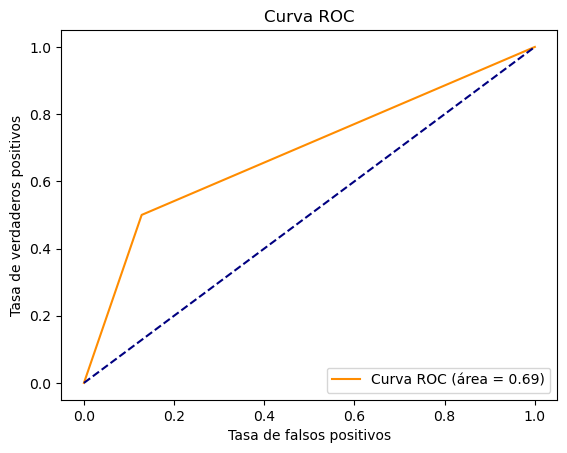

{'AUC': 0.686, 'Confusion Matrix': array([[109,  16],
       [ 45,  45]], dtype=int64), 'Accuracy Score': 0.7162790697674418, 'ECM': 0.2837209302325581}


In [72]:
# Definir el modelo
modelo = LogisticRegression(max_iter=10000)
# Usar la función evalua_metodo
resultados = evalua_metodo(modelo, X_train, y_train, X_test, y_test)
print(resultados)

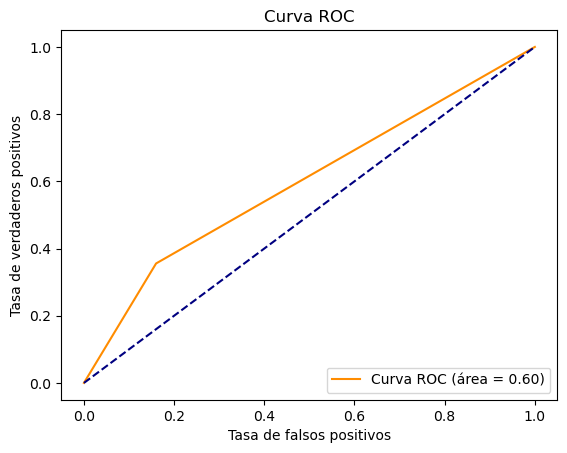

{'AUC': 0.5977777777777779, 'Confusion Matrix': array([[105,  20],
       [ 58,  32]], dtype=int64), 'Accuracy Score': 0.6372093023255814, 'ECM': 0.3627906976744186}


In [73]:
# Definir el modelo
knn = KNeighborsClassifier(n_neighbors=5)
#Usar la función evalua_metodo
resultados = evalua_metodo(knn, X_train, y_train, X_test, y_test)
print(resultados)

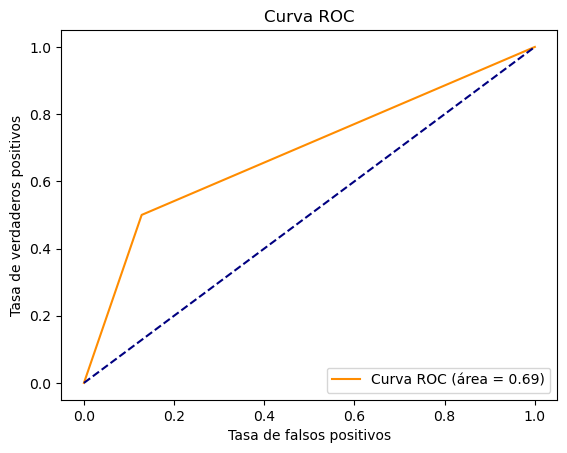

{'AUC': 0.686, 'Confusion Matrix': array([[109,  16],
       [ 45,  45]], dtype=int64), 'Accuracy Score': 0.7162790697674418, 'ECM': 0.2837209302325581}


In [74]:
# Definir el modelo
modelo3= LinearDiscriminantAnalysis()
#Usar la función evalua_metodo
resultados = evalua_metodo(modelo3, X_train, y_train, X_test, y_test)
print(resultados)

#### Probando la función cross_validation

In [75]:
# Ejemplo de la función con 5 particiones,sin estandarización y sin reporte de la proporción de variables con coeficientes estimados iguales a cero.. 
cross_validation(modelo,5,X,y,std=False,coef=False)

,Particion,MSE,valor_auc,accuracy,matriz_confusion,proporcion_variables_cero
0,1,0.286713,0.667505,0.713287,"[[76, 14], [27, 26]]",None
1,2,0.293706,0.676268,0.706294,"[[71, 14], [28, 30]]",None
2,3,0.286713,0.681053,0.713287,"[[73, 19], [22, 29]]",None
3,4,0.279720,0.698850,0.720280,"[[69, 15], [25, 34]]",None
4,5,0.380282,0.613857,0.619718,"[[60, 13], [41, 28]]",None


#### Probando evalua_config

In [76]:
# Ejemplo de uso para ambos métodos de regularización:
lambdas_ambos = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
resultados_ambos = evalua_config(['ridge','lasso'], lambdas_ambos, X, y)

La configuración óptima es: Lambda = 100.0, Model Type = ridge


In [77]:
print(resultados_ambos)


   Model Type     Lambda       ECM
0       ridge      0.001  0.305427
1       ridge      0.010  0.305427
2       ridge      0.100  0.305427
3       ridge      1.000  0.305427
4       ridge     10.000  0.304028
5       ridge    100.000  0.294199
6       ridge   1000.000  0.303969
7       ridge  10000.000  0.306796
8       lasso      0.001  0.305427
9       lasso      0.010  0.305427
10      lasso      0.100  0.305427
11      lasso      1.000  0.304028
12      lasso     10.000  0.308185
13      lasso    100.000  0.361282
14      lasso   1000.000  0.406274
15      lasso  10000.000  0.406274


#### Probando evalua_multiples_metodos

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

# Definir los hiperparámetros para cada método
hiperparametros_rl = {
    'lambdas': [0.1, 1, 10, 50],
}

hiperparametros_lda = {
    'solver': 'lsqr',
}

hiperparametros_knn = {
    'n_neighbors': 3,
}

# Lista de métodos y sus hiperparámetros
metodos = [
    {
        'nombre': 'Regresión Logística',
        'hiperparametros': hiperparametros_rl,
    },
    {
        'nombre': 'Análisis de Discriminante Lineal',
        'hiperparametros': hiperparametros_lda,
    },
    {
        'nombre': 'KNN',
        'hiperparametros': hiperparametros_knn,
    },
]


In [79]:
# Utilizar la función evalua_multiples_metodos con datos de ejemplo
resultados = evalua_multiples_metodos(X_train,y_train, X_test,y_test, metodos)

In [80]:
resultados

,AUC,Confusion Matrix,Accuracy Score,ECM,Modelo,Hiperparámetros,Método de Regularización,Hiperparámetro Óptimo
0,0.663778,"[[109, 16], [49, 41]]",0.697674,0.302326,Regresión Logística,"{'lambdas': [0.1, 1, 10, 50]}",ridge,50.0
1,0.686000,"[[109, 16], [45, 45]]",0.716279,0.283721,Análisis de Discriminante Lineal,{'solver': 'lsqr'},None,NaN
2,0.716000,"[[104, 21], [36, 54]]",0.734884,0.265116,KNN,{'n_neighbors': 3},None,NaN
